In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

In [2]:
df=pd.read_csv("credit_risk_dataset.csv")

In [3]:
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [110]:
df.shape

(32416, 12)

In [111]:
df=df.drop_duplicates()

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [113]:
df.isnull().sum().sort_values(ascending = False)/len(df)*100

loan_int_rate                 9.547754
person_emp_length             2.736303
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [114]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [115]:
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32416.000000   3.241600e+04        31529.00000  32416.000000   
mean      27.747008   6.609164e+04            4.79051   9593.845632   
std        6.354100   6.201558e+04            4.14549   6322.730241   
min       20.000000   4.000000e+03            0.00000    500.000000   
25%       23.000000   3.854200e+04            2.00000   5000.000000   
50%       26.000000   5.500000e+04            4.00000   8000.000000   
75%       30.000000   7.921800e+04            7.00000  12250.000000   
max      144.000000   6.000000e+06          123.00000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29321.000000  32416.000000         32416.000000   
mean       11.017265      0.218688             0.170250   
std         3.241680      0.413363             0.106812   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32416.000000  
mean                     5.811297  
std                      4.059030  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [116]:
df["loan_status"].value_counts()/len(df)*100

0    78.13117
1    21.86883
Name: loan_status, dtype: float64

C:\Users\Sanwal Khan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



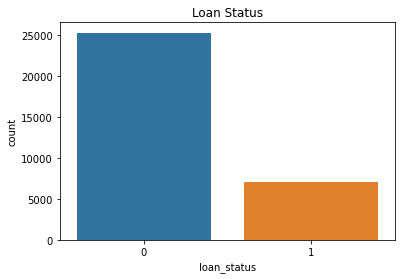

In [117]:
sns.countplot(df["loan_status"])
plt.title("Loan Status")
ex.pie(df,names='loan_status',title='Propotion Of Loan Status',hole=0.33)

In [118]:
df_num=df.select_dtypes(include='number')
df_cat=df.select_dtypes(include=['object','category'])

In [119]:
df_num

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0              22          59000              123.0      35000          16.02   
1              21           9600                5.0       1000          11.14   
2              25           9600                1.0       5500          12.87   
3              23          65500                4.0      35000          15.23   
4              24          54400                8.0      35000          14.27   
...           ...            ...                ...        ...            ...   
32576          57          53000                1.0       5800          13.16   
32577          54         120000                4.0      17625           7.49   
32578          65          76000                3.0      35000          10.99   
32579          56         150000                5.0      15000          11.48   
32580          66          42000                2.0       6475           9.99   

       loan_status  loan_percent_income  cb_person_cred_hist_length  
0                1                 0.59                           3  
1                0                 0.10                           2  
2                1                 0.57                           3  
3                1                 0.53                           2  
4                1                 0.55                           4  
...            ...                  ...                         ...  
32576            0                 0.11                          30  
32577            0                 0.15                          19  
32578            1                 0.46                          28  
32579            0                 0.10                          26  
32580            0                 0.15                          30  

[32416 rows x 8 columns]

In [120]:
df_cat

person_home_ownership      loan_intent loan_grade  \
0                      RENT         PERSONAL          D   
1                       OWN        EDUCATION          B   
2                  MORTGAGE          MEDICAL          C   
3                      RENT          MEDICAL          C   
4                      RENT          MEDICAL          C   
...                     ...              ...        ...   
32576              MORTGAGE         PERSONAL          C   
32577              MORTGAGE         PERSONAL          A   
32578                  RENT  HOMEIMPROVEMENT          B   
32579              MORTGAGE         PERSONAL          B   
32580                  RENT          MEDICAL          B   

      cb_person_default_on_file  
0                             Y  
1                             N  
2                             N  
3                             N  
4                             Y  
...                         ...  
32576                         N  
32577                         N  
32578                         N  
32579                         N  
32580                         N  

[32416 rows x 4 columns]

In [121]:
df["loan_status"].describe()

count    32416.000000
mean         0.218688
std          0.413363
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [122]:
df.describe(include='O').T

count unique        top   freq
person_home_ownership      32416      4       RENT  16378
loan_intent                32416      6  EDUCATION   6411
loan_grade                 32416      7          A  10703
cb_person_default_on_file  32416      2          N  26686

In [123]:
df.groupby(["person_home_ownership","loan_intent"])["loan_intent"].count()

person_home_ownership  loan_intent      
MORTGAGE               DEBTCONSOLIDATION    2298
                       EDUCATION            2608
                       HOMEIMPROVEMENT      1732
                       MEDICAL              2178
                       PERSONAL             2330
                       VENTURE              2223
OTHER                  DEBTCONSOLIDATION      17
                       EDUCATION              17
                       HOMEIMPROVEMENT        12
                       MEDICAL                17
                       PERSONAL               18
                       VENTURE                25
OWN                    DEBTCONSOLIDATION      71
                       EDUCATION             526
                       HOMEIMPROVEMENT       317
                       MEDICAL               433
                       PERSONAL              443
                       VENTURE               773
RENT                   DEBTCONSOLIDATION    2803
                       EDUCA

In [124]:
ex.pie(df,names='person_home_ownership',title='Propotion Of Person Home Ownership',hole=0.33)

In [125]:
ex.pie(df,names='loan_intent',title='Propotion Of Loan Intent',hole=0.33)

In [126]:
ex.pie(df,names='loan_grade',title='Propotion Of Loan Intent',hole=0.33)

In [127]:
(ex.histogram(df,x='loan_grade',title='Propotion Of Loan Intent'))
ex.pie(df,names='loan_grade', title="Propotion Of Loan Intent")

In [128]:
print(df["cb_person_default_on_file"].value_counts())
ex.pie(df,names='cb_person_default_on_file',title='Propotion Of CB Person Default On File',hole=0.5)


N    26686
Y     5730
Name: cb_person_default_on_file, dtype: int64


# Pie Chart visuilization of Categorical

In [131]:
ex.pie(df,names='person_home_ownership',title='person_home_ownership')

In [132]:
ex.pie(df,names='loan_intent',title='loan_intent')

In [133]:
ex.pie(df,names='loan_grade',title='loan_grade')

In [134]:
ex.pie(df,names='cb_person_default_on_file',title='cb_person_default_on_file')

In [150]:
df_num


person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0              22          59000              123.0      35000          16.02   
1              21           9600                5.0       1000          11.14   
2              25           9600                1.0       5500          12.87   
3              23          65500                4.0      35000          15.23   
4              24          54400                8.0      35000          14.27   
...           ...            ...                ...        ...            ...   
32576          57          53000                1.0       5800          13.16   
32577          54         120000                4.0      17625           7.49   
32578          65          76000                3.0      35000          10.99   
32579          56         150000                5.0      15000          11.48   
32580          66          42000                2.0       6475           9.99   

       loan_status  loan_percent_income  cb_person_cred_hist_length  
0                1                 0.59                           3  
1                0                 0.10                           2  
2                1                 0.57                           3  
3                1                 0.53                           2  
4                1                 0.55                           4  
...            ...                  ...                         ...  
32576            0                 0.11                          30  
32577            0                 0.15                          19  
32578            1                 0.46                          28  
32579            0                 0.10                          26  
32580            0                 0.15                          30  

[32416 rows x 8 columns]

In [161]:
df.groupby(['person_age','loan_status'])['person_age'].count()

person_age  loan_status
20          0                13
            1                 2
21          0               843
            1               370
22          0              2725
                           ... 
80          0                 1
84          0                 1
94          0                 1
123         0                 2
144         0                 3
Name: person_age, Length: 105, dtype: int64

C:\Users\Sanwal Khan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='person_home_ownership', ylabel='count'>

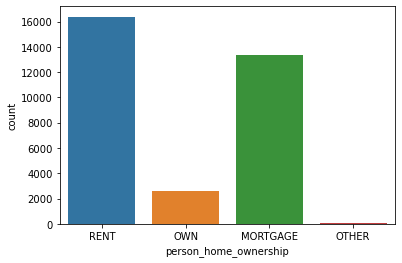

In [164]:
sns.countplot(df["person_home_ownership"])

In [ ]:
plt.pi